### Importing required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import  RandomForestClassifier , GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore") 

### Data Collection:

In [2]:
data = pd.read_csv("loan_prediction.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


I can see that the data has "nan" vales and so I have to fix them to get good accuracy. 

In [3]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
data.shape

(614, 13)

### Different types of datatypes present : -

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

I can see that the data is with "float" and "object" types data.

### Information of the data:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


I can see that few columns in the data are with "nan" values and so I have to treat them in our model for the good accuracy.

### Checking the null-values in the data:

In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

I can see that most of our columns have null values.

In [8]:
data.isnull().values.any()

True

### Missing values :-

In [9]:
data.isnull().values.any()

True

### Statistical information:

In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Documentation:-
    
Here I can see in count, that there are few data missing in each columns and also some columns are having null values and also I can see that the "mean" and "std" values are with large difference in most of the columns and in few "std" is greater than "mean".

In [12]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Dropping the unrequired columns:

 The Column "Loan_ID" will not have any impact on the "prediction", so I'm dropping it.

In [14]:
data = data.drop(["Loan_ID"] , axis = 1)

### Checking the count of the label: "Loan_Status" :

In [15]:
Status_count = pd.DataFrame(data["Loan_Status"].value_counts())
Status_count

,Loan_Status
Y,422
N,192


I can see that the number of loan approvals are 422 and the number of loan rejections are 192.

### Filling the null-values:

In [17]:
data["Gender"].fillna(data["Gender"].mode()[0],inplace = True)
data["Married"].fillna(data["Married"].mode()[0],inplace = True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace = True)
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace = True)
data["LoanAmount"].fillna(data["LoanAmount"].mode()[0],inplace = True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean(),inplace = True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace = True)

### Checking the null-values:

In [19]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
data.isnull().values.any()

False

Now, I can saw that there are no null-values.

### Plotting the null-values through heat-map:

<AxesSubplot:>

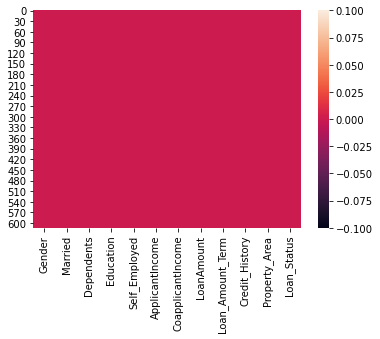

In [23]:
sns.heatmap(data.isnull())

No null-values can be seen in the heatmap.

### Visualization:
#### Univariate Analysis:

#### Firstly I will plot for our label: "Loan_Status":

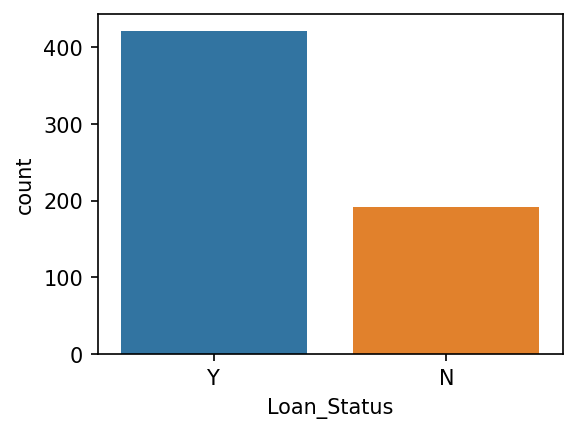

In [27]:
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(data.Loan_Status);

I can see that the category "Y" has the highest count compared to the category "N".

#### Gender:

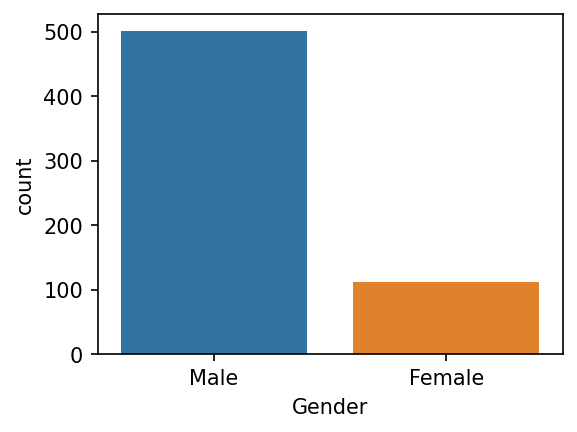

In [28]:
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(data.Gender);

I can see that the category "Male" has the highest count in the column "Gender" and the least is for the "Female".

In [29]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Married:

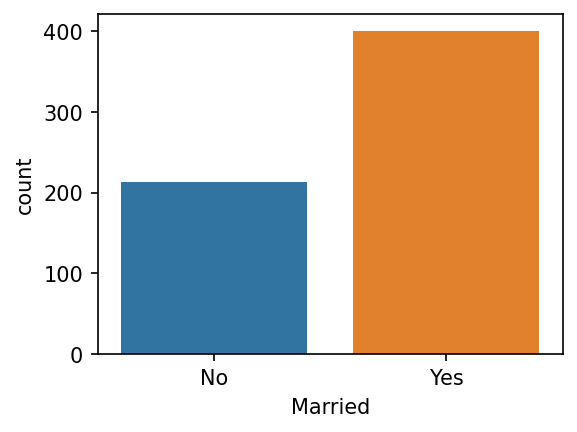

In [30]:
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(data.Married);

I can see that the highest count is for the category "Yes" in the column "Married" and the least for the other.

#### Dependents:

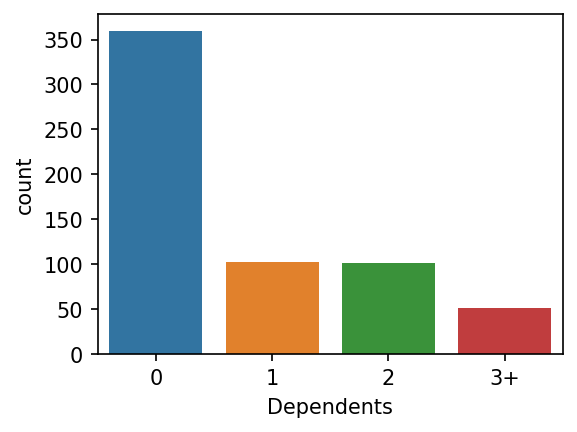

In [31]:
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(data.Dependents);

I can see that the highest count is for the category "0" of the column "Dependents".

#### Education:

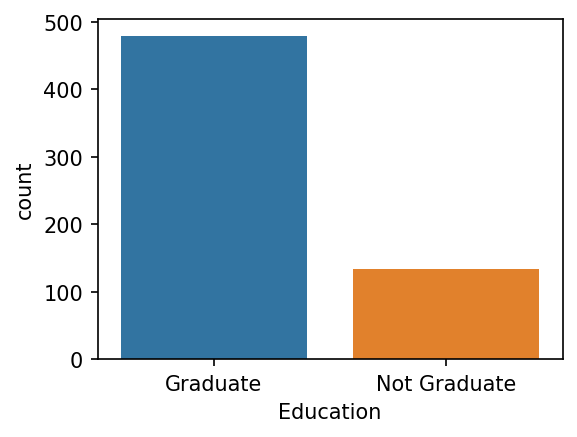

In [32]:
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(data.Education);

I can see that the count is high in column "Graduate" and low in the other.

#### Self_Employed:

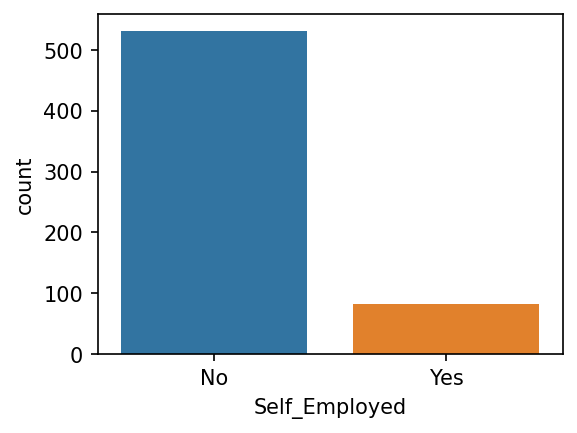

In [34]:
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(data.Self_Employed);

I can see that the count is high in the category "No" of the column "Self_Employed".

#### ApplicantIncome:

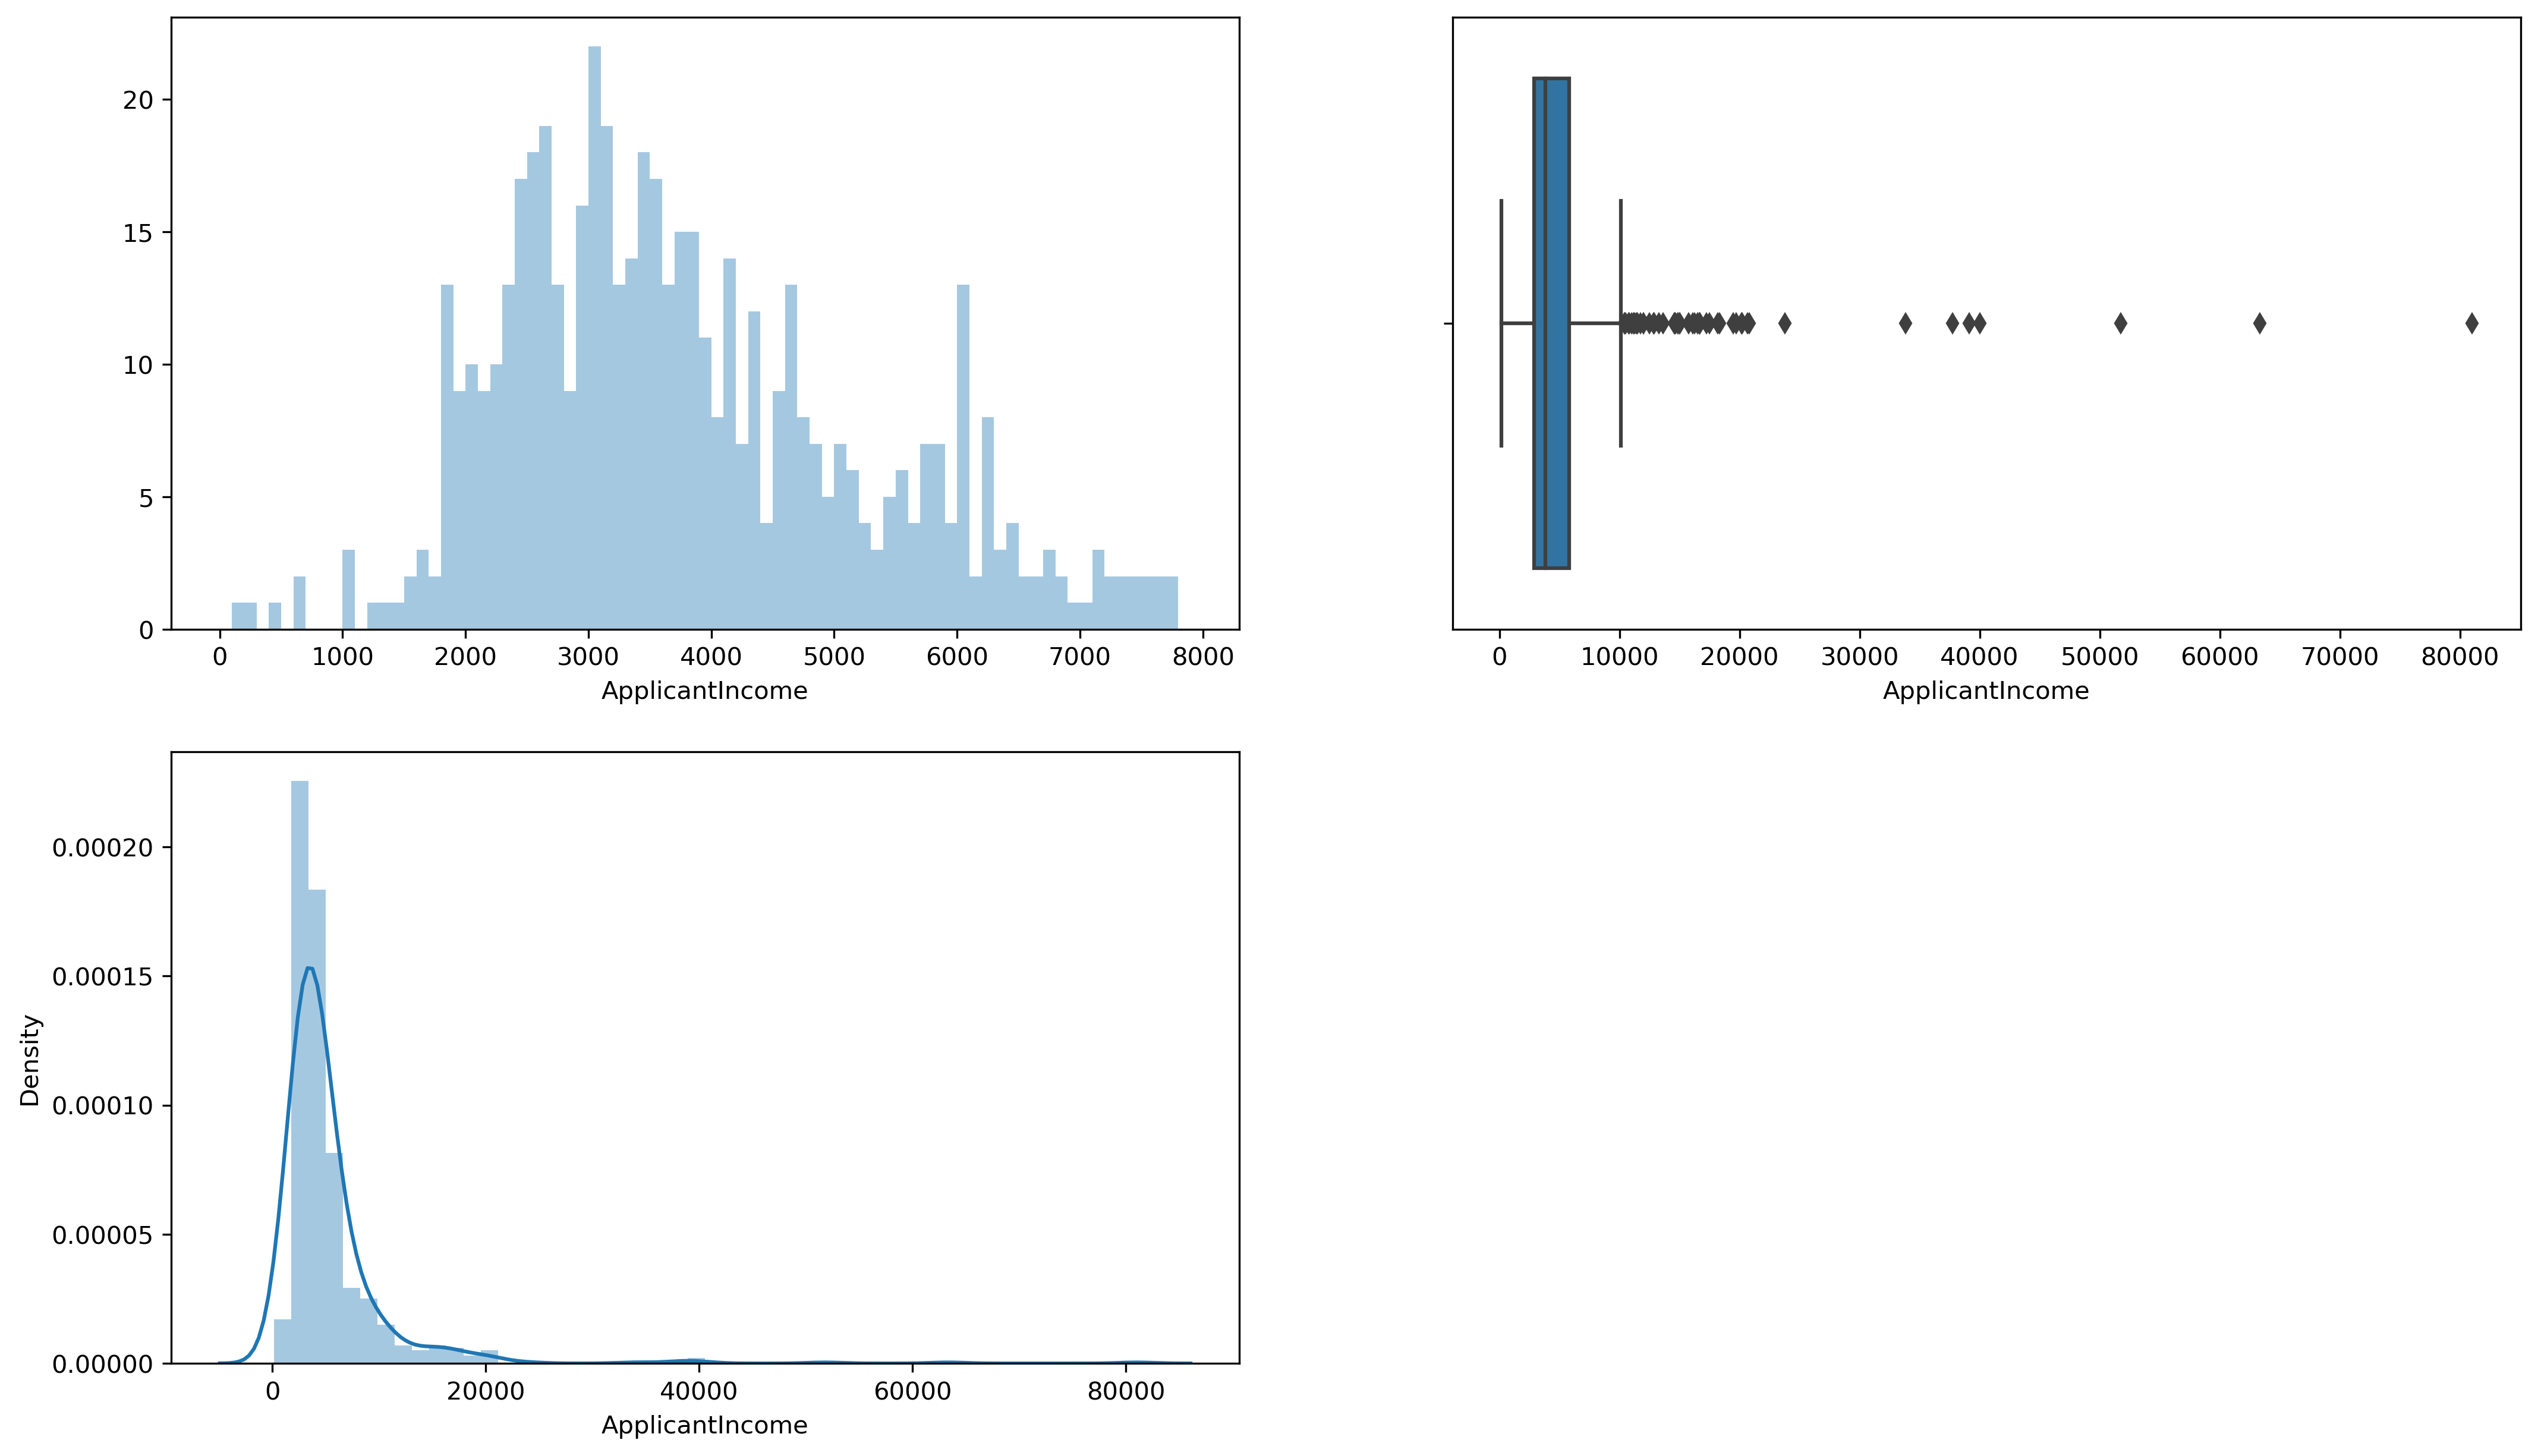

In [39]:
plt.figure(figsize=(17,10),dpi=300)
plt.subplot(2,2,1)
sns.distplot(data['ApplicantIncome'], kde=False, bins=range(0,8000,100));
plt.subplot(2,2,2)
sns.boxplot(data['ApplicantIncome']);
plt.subplot(2,2,3)
sns.distplot(data['ApplicantIncome']);

I can see that there are outliers present in the boxplot and the distribution curve is with narrow in its peak and has skewness.

#### CoapplicantIncome:

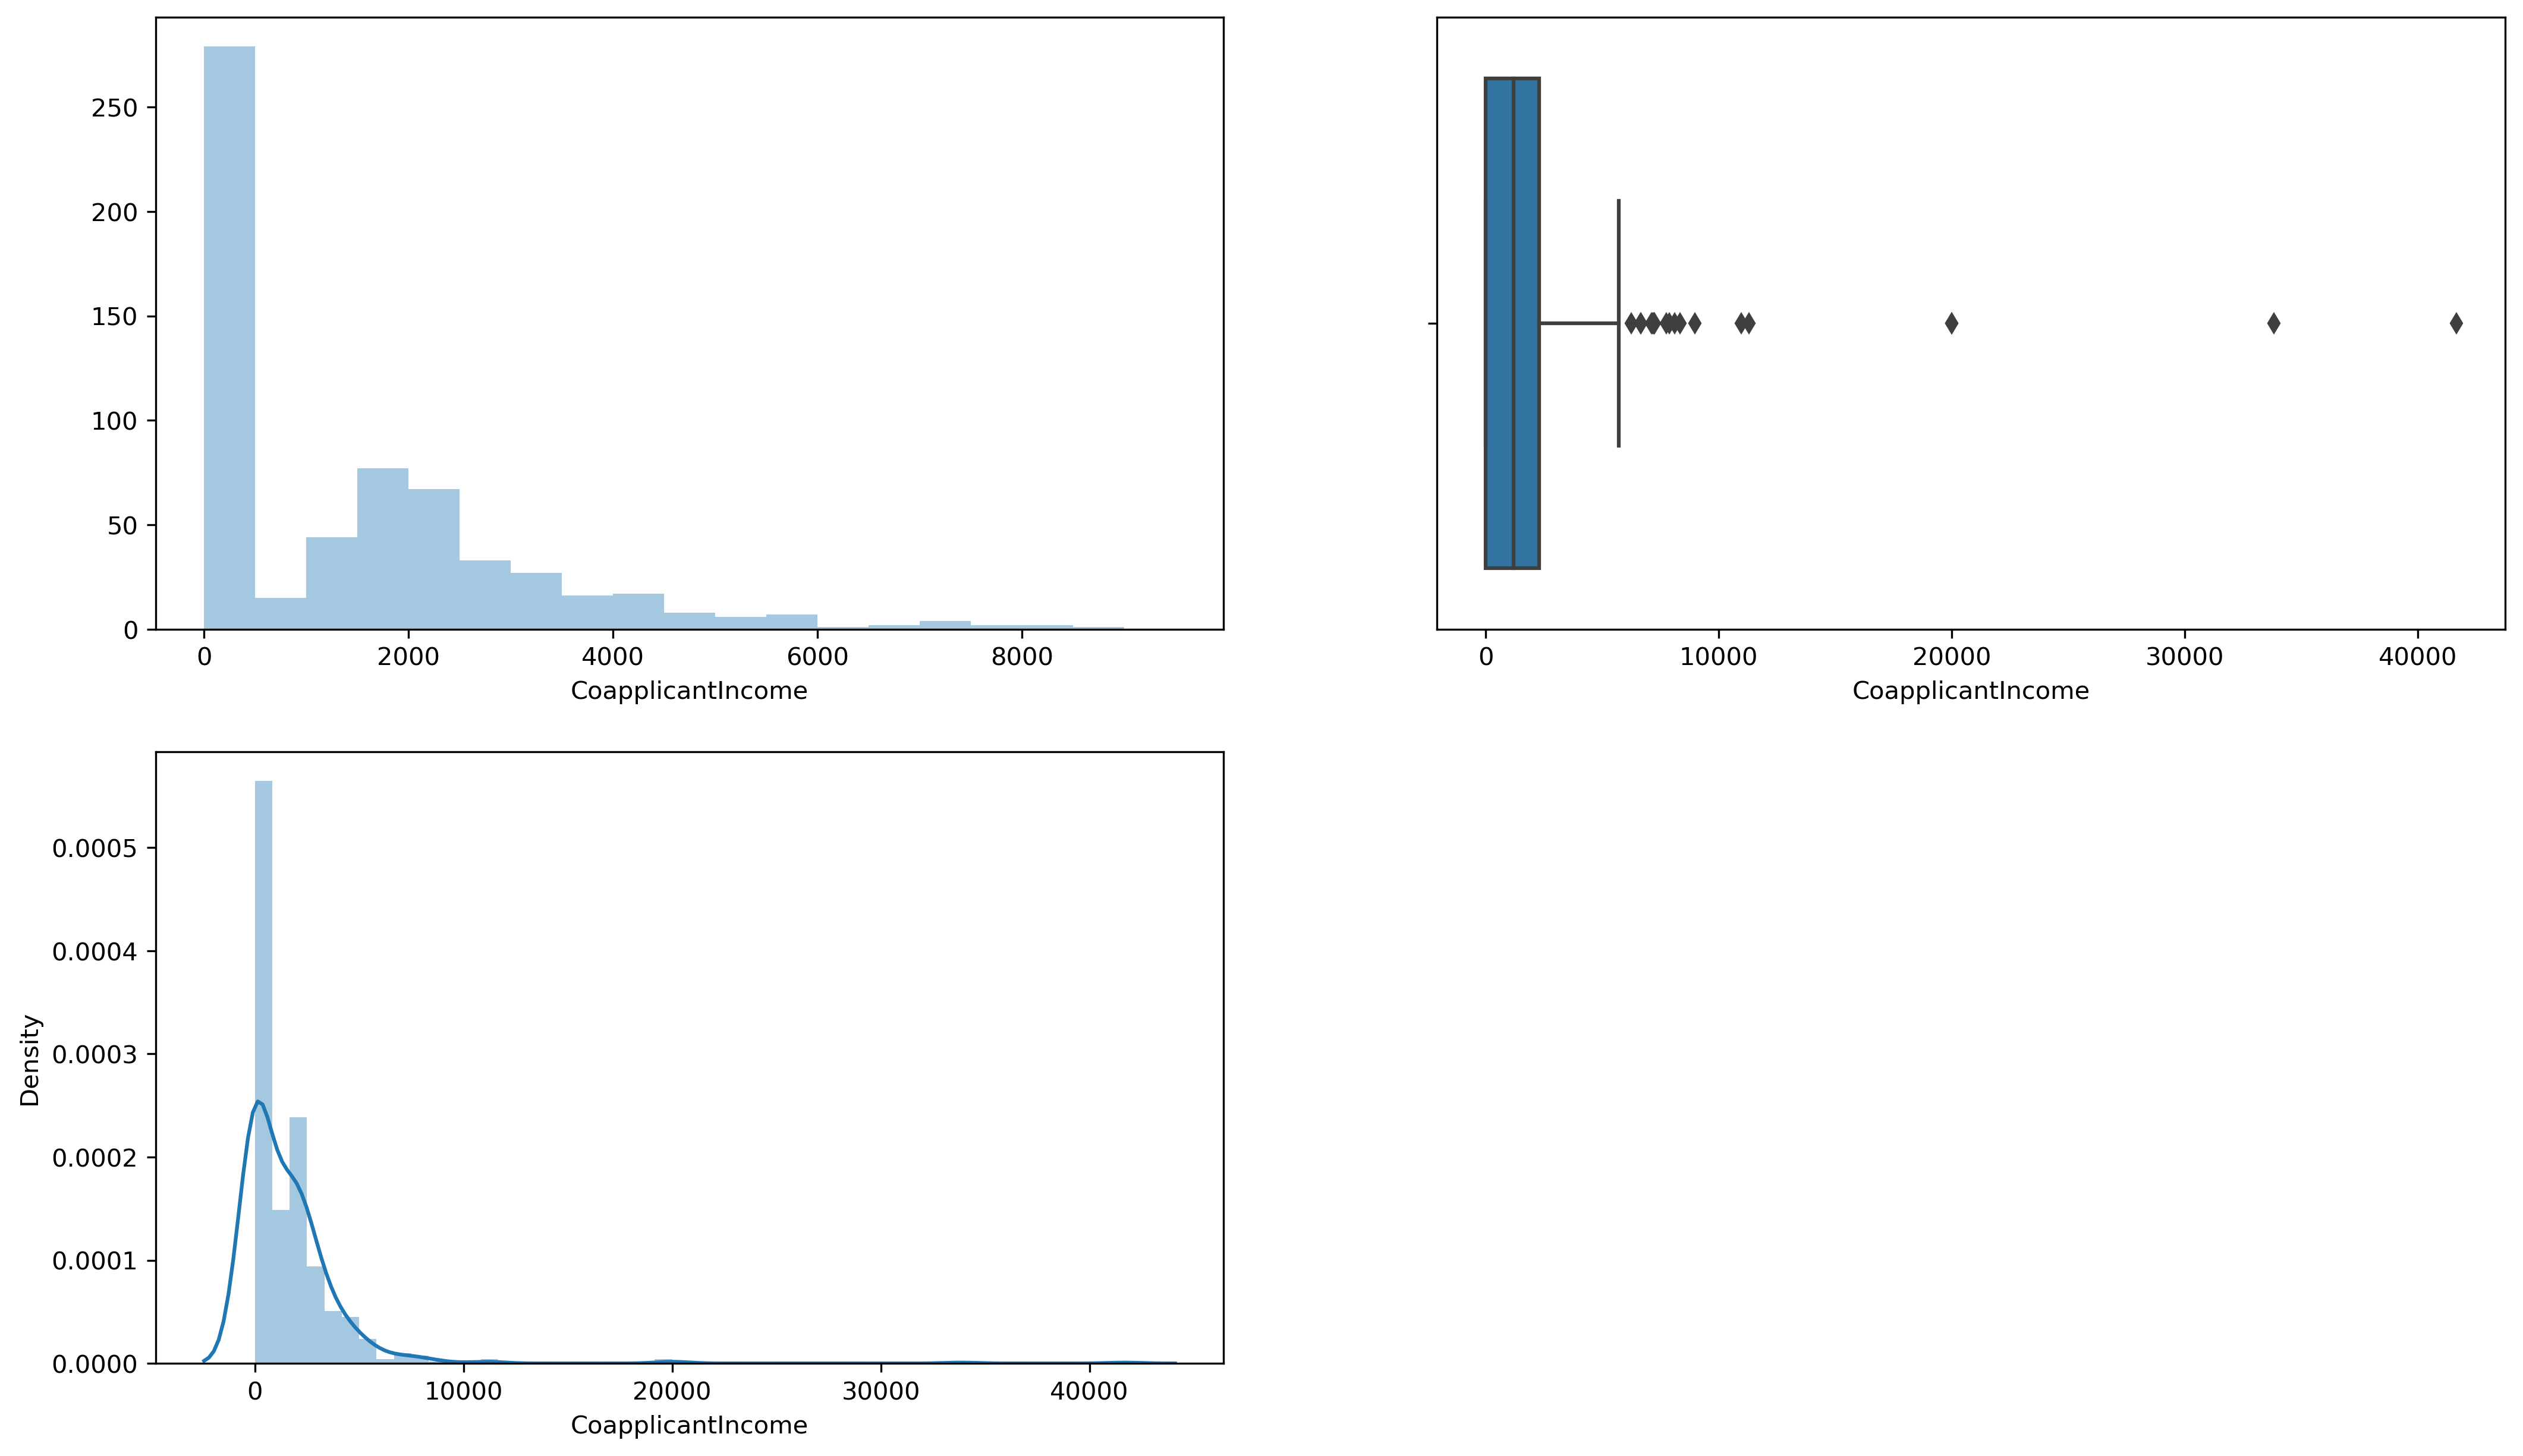

In [40]:
plt.figure(figsize=(17,10),dpi=300)
plt.subplot(2,2,1)
sns.distplot(data['CoapplicantIncome'], kde=False, bins=range(0, 10000, 500));
plt.subplot(2,2,2)
sns.boxplot(data['CoapplicantIncome']);
plt.subplot(2,2,3)
sns.distplot(data['CoapplicantIncome']);

I can see that there are outliers present in the boxplot and the distribution curve is with narrow in its peak and has skewness.

#### LoanAmount:

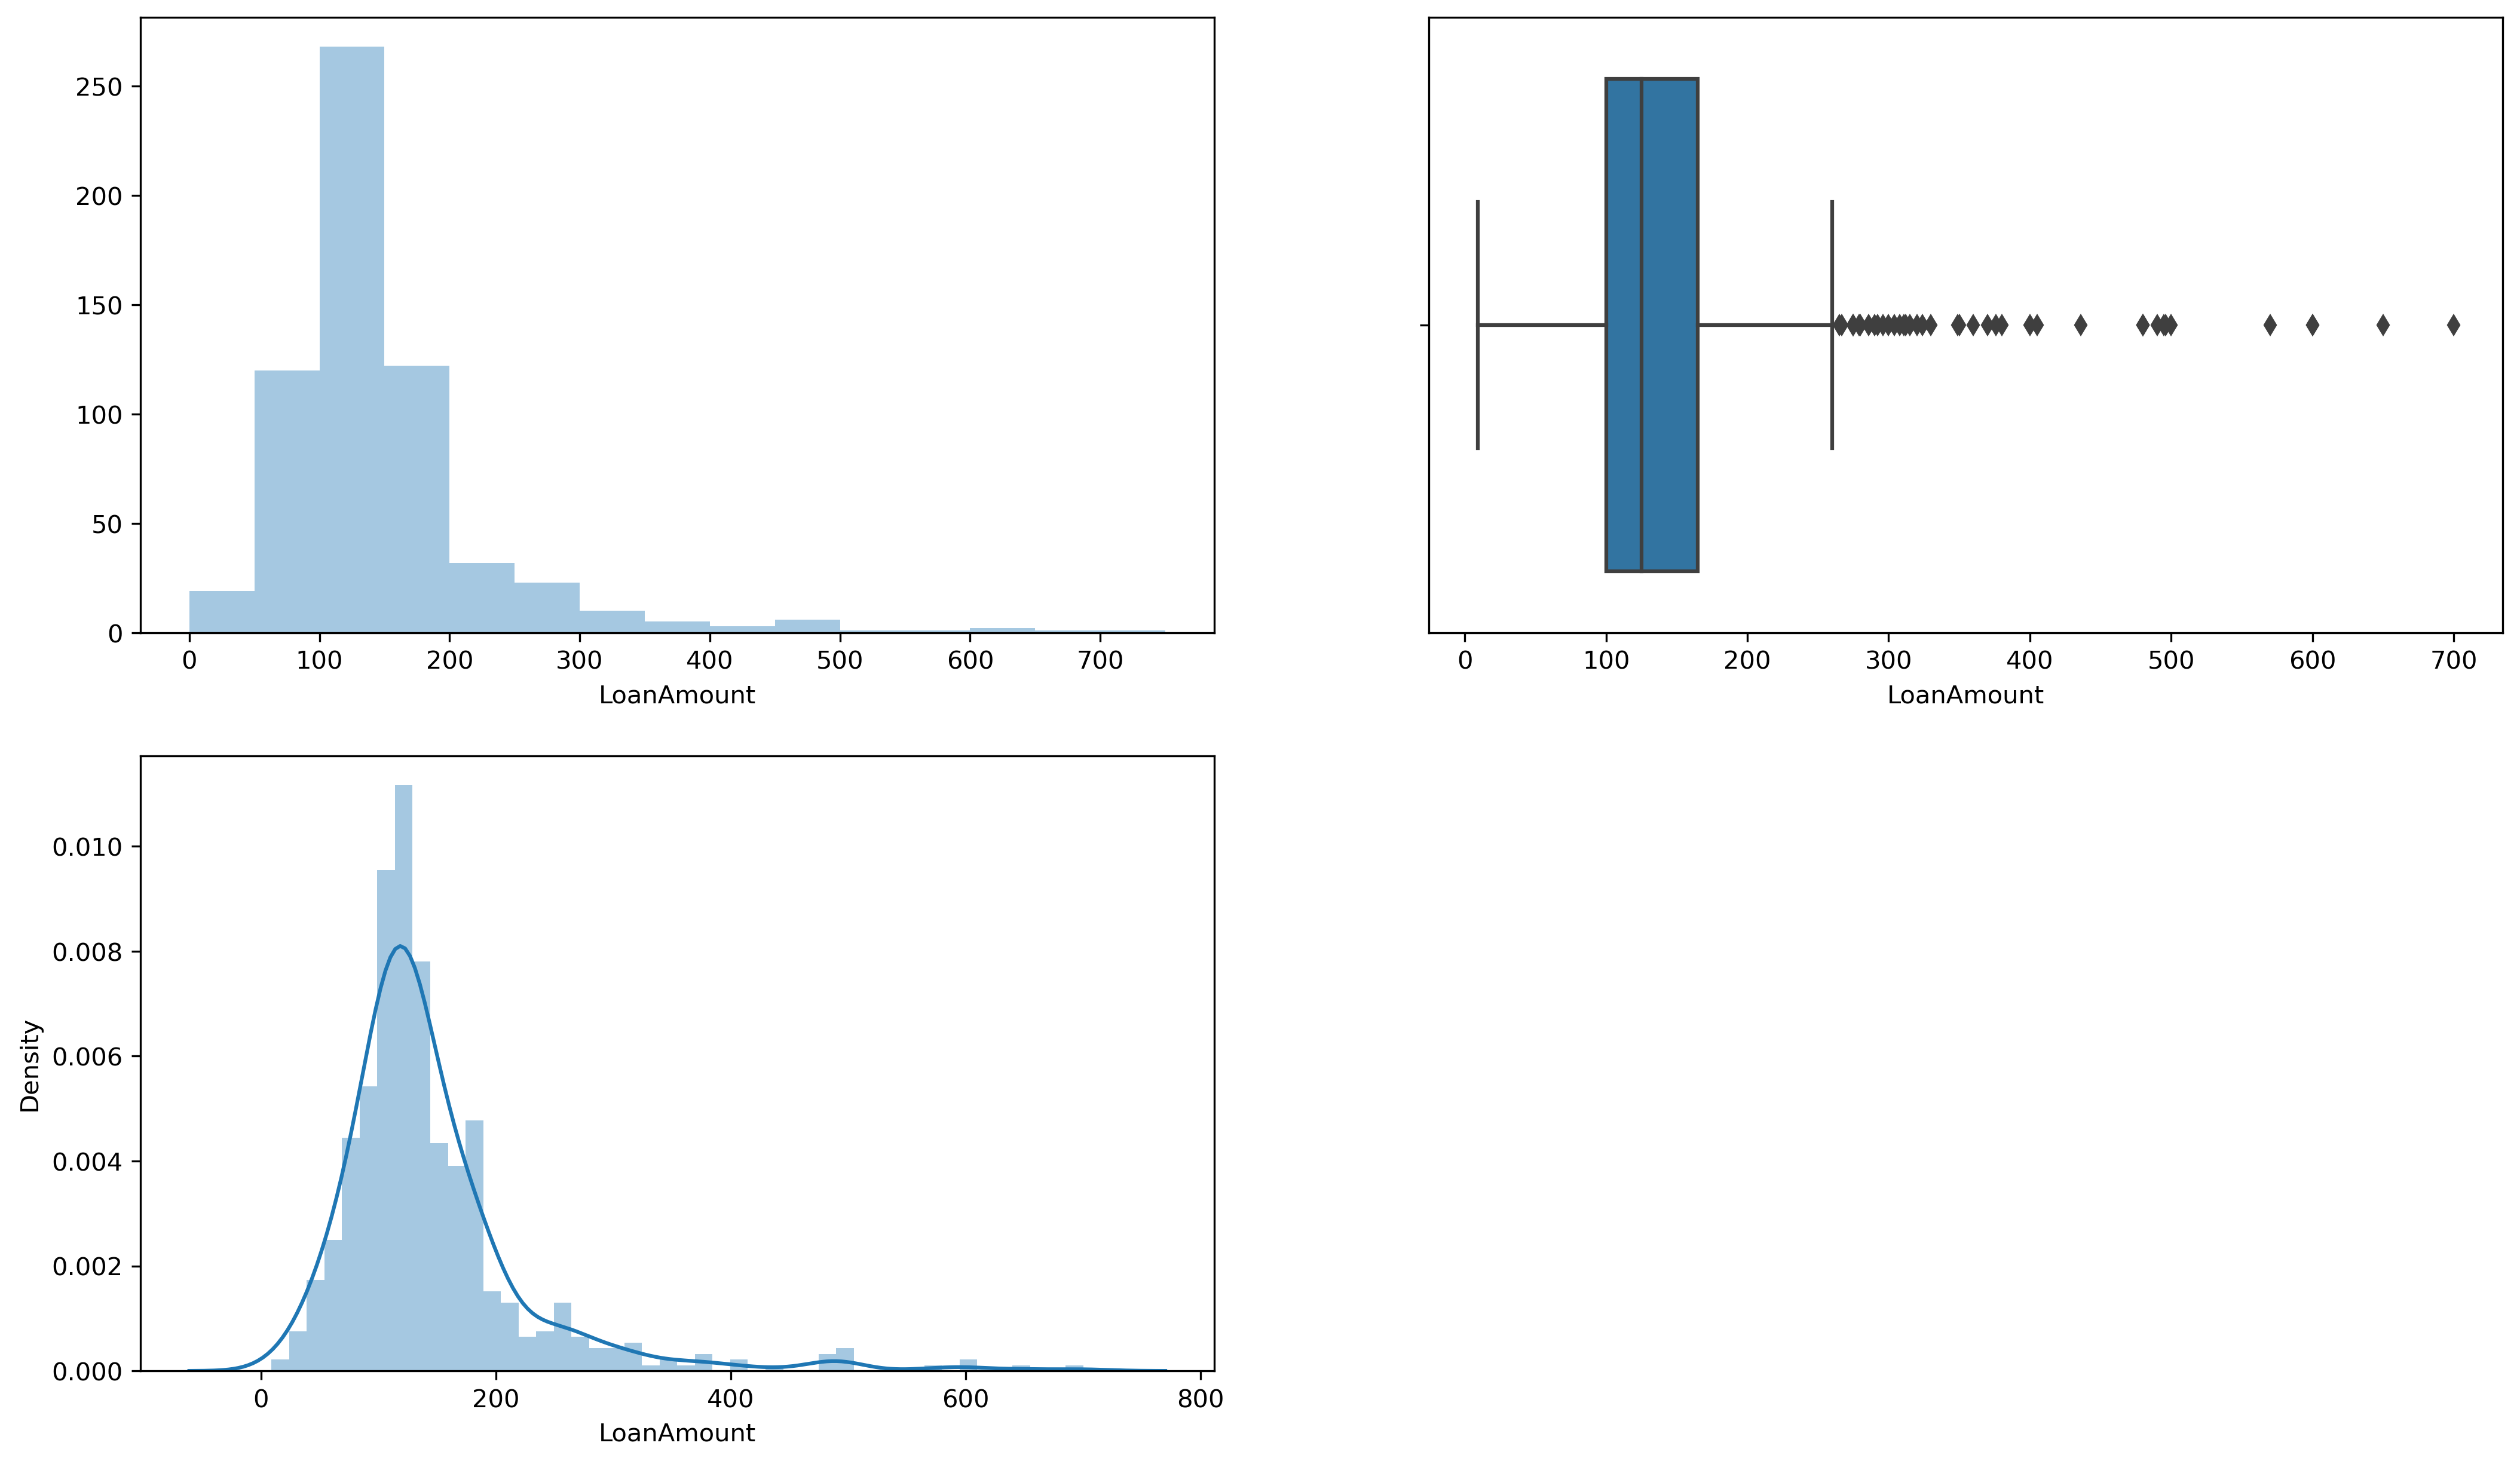

In [45]:
plt.figure(figsize=(17,10),dpi=300)
plt.subplot(2,2,1)
sns.distplot(data['LoanAmount'], kde=False, bins=range(0,800,50));
plt.subplot(2,2,2)
sns.boxplot(data['LoanAmount']);
plt.subplot(2,2,3)
sns.distplot(data['LoanAmount']);

I can see tnat there are outliers present in the boxplot and the distribution curve is with narrow in its peak and has skewness.

#### Loan_Amount_Term:

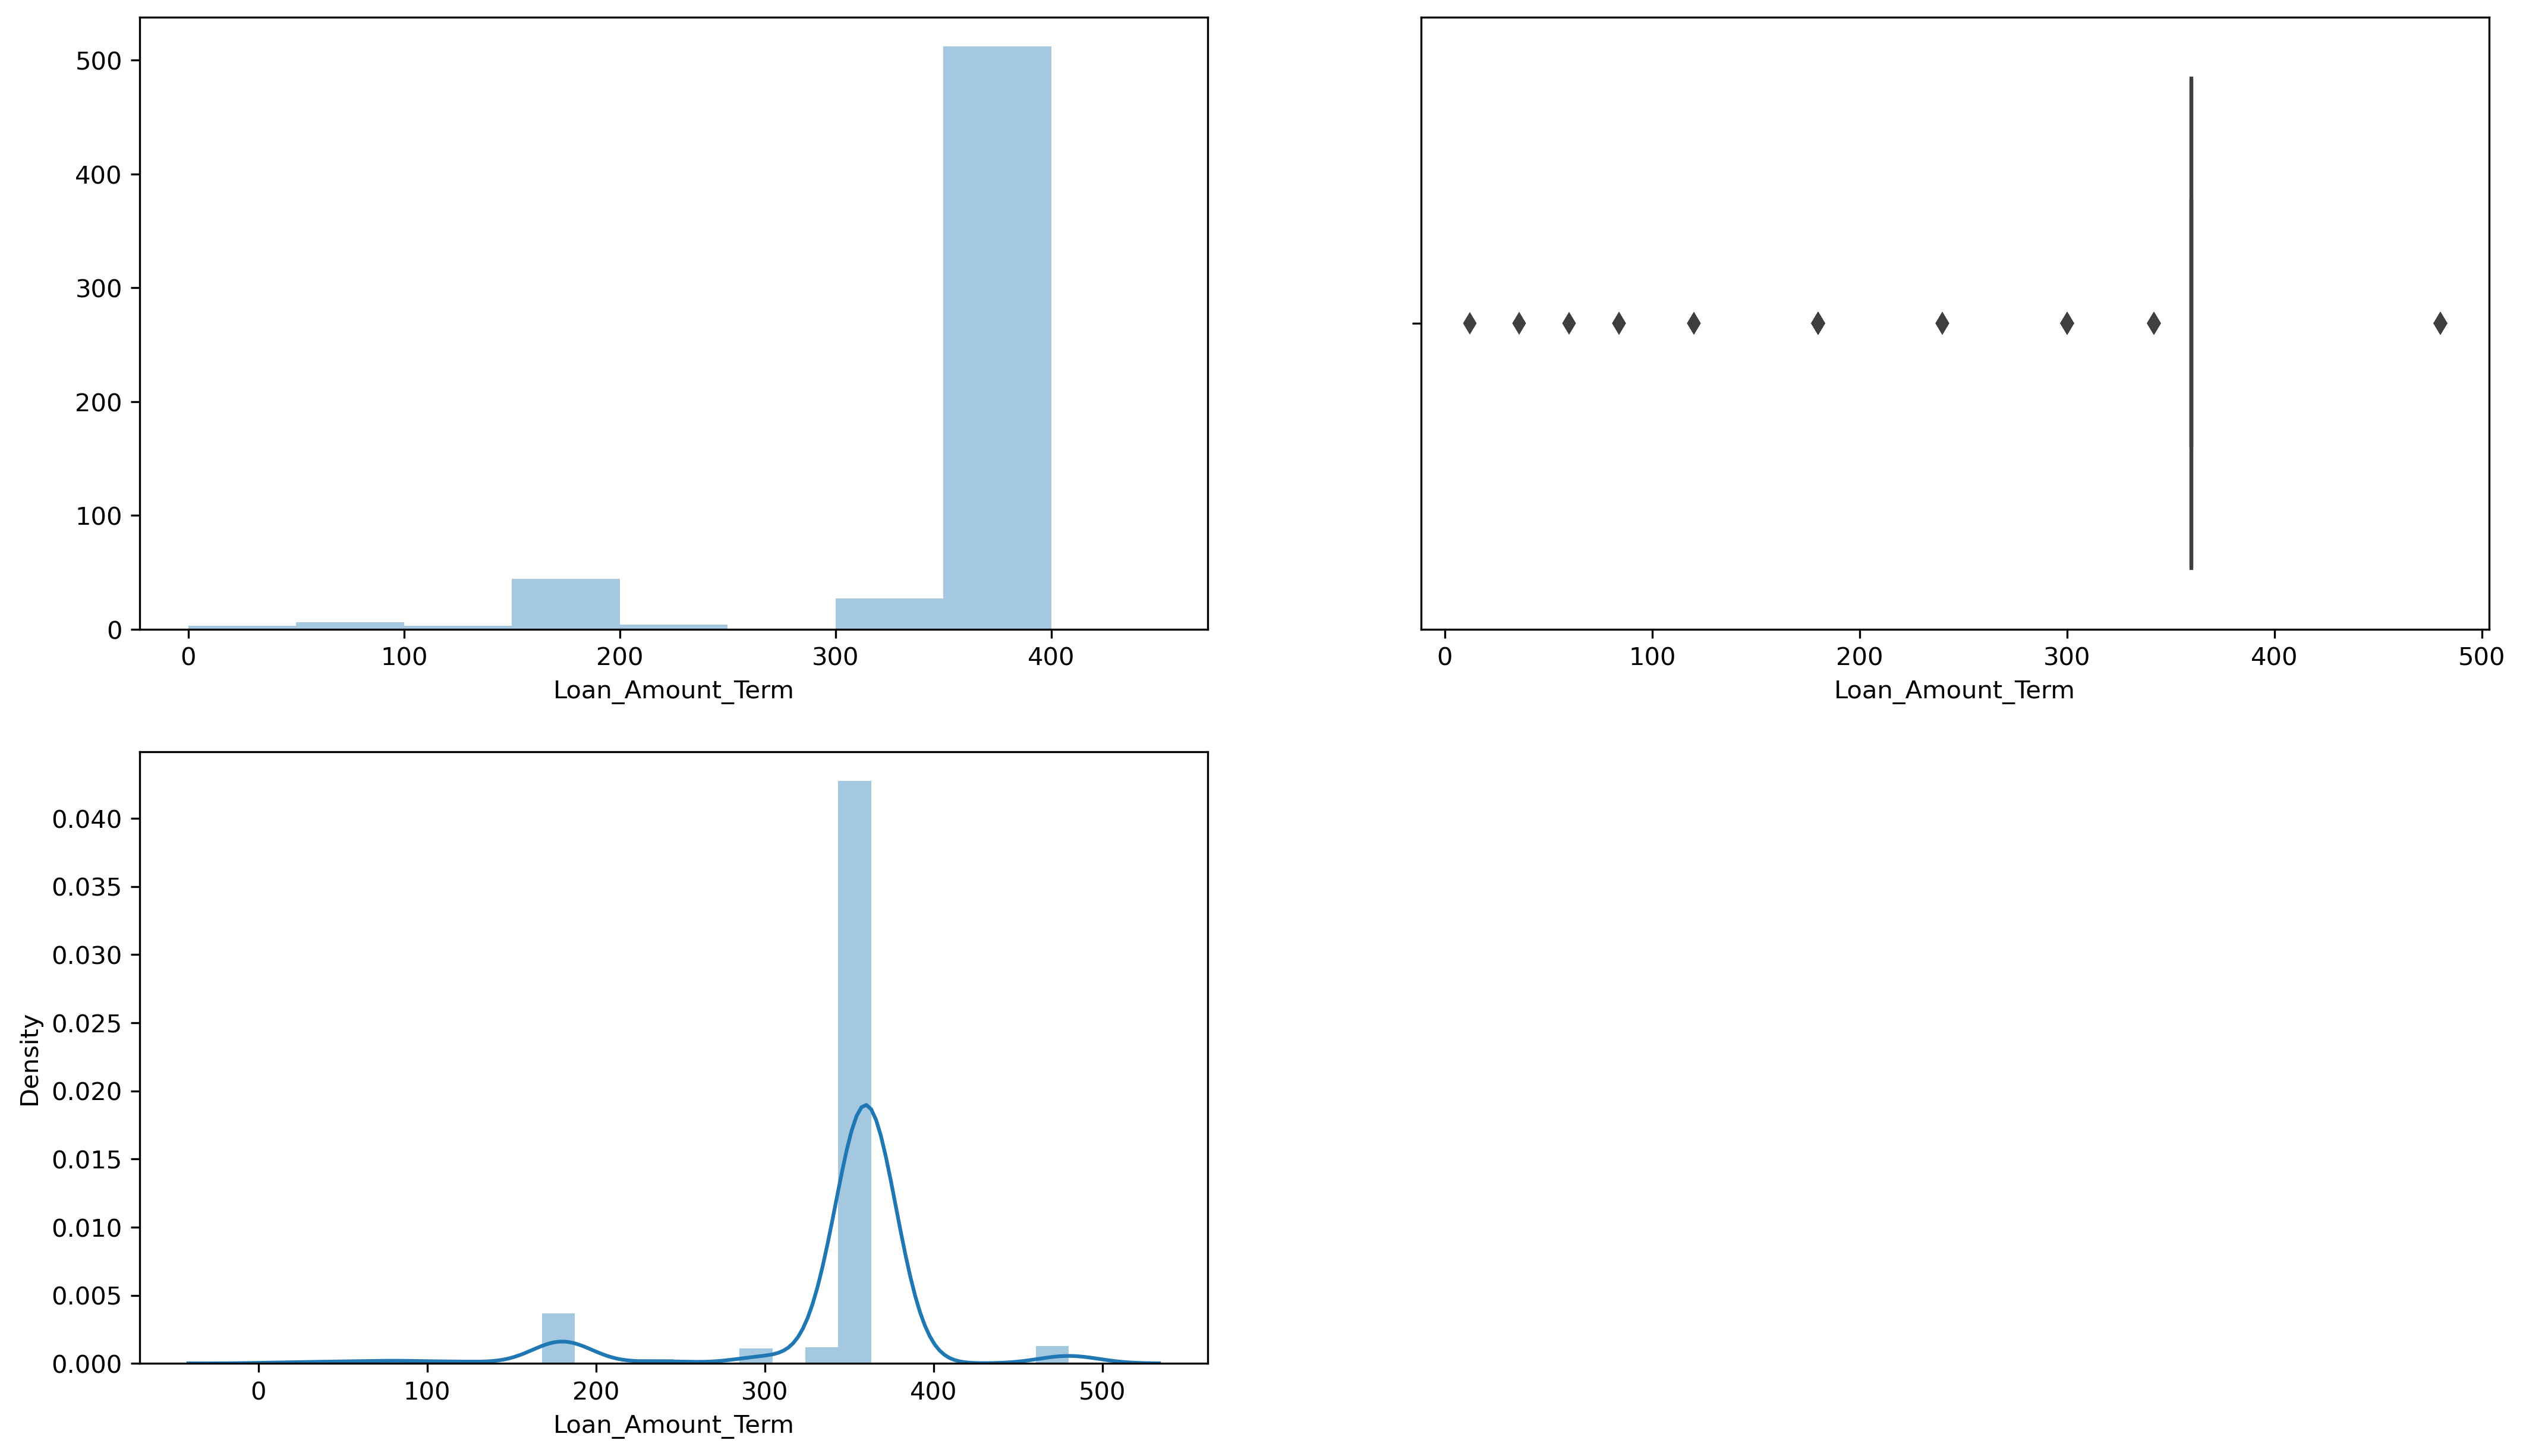

In [44]:
plt.figure(figsize=(17,10),dpi=300)
plt.subplot(2,2,1)
sns.distplot(data['Loan_Amount_Term'], kde=False, bins=range(0,500,50));
plt.subplot(2,2,2)
sns.boxplot(data['Loan_Amount_Term']);
plt.subplot(2,2,3)
sns.distplot(data['Loan_Amount_Term']);

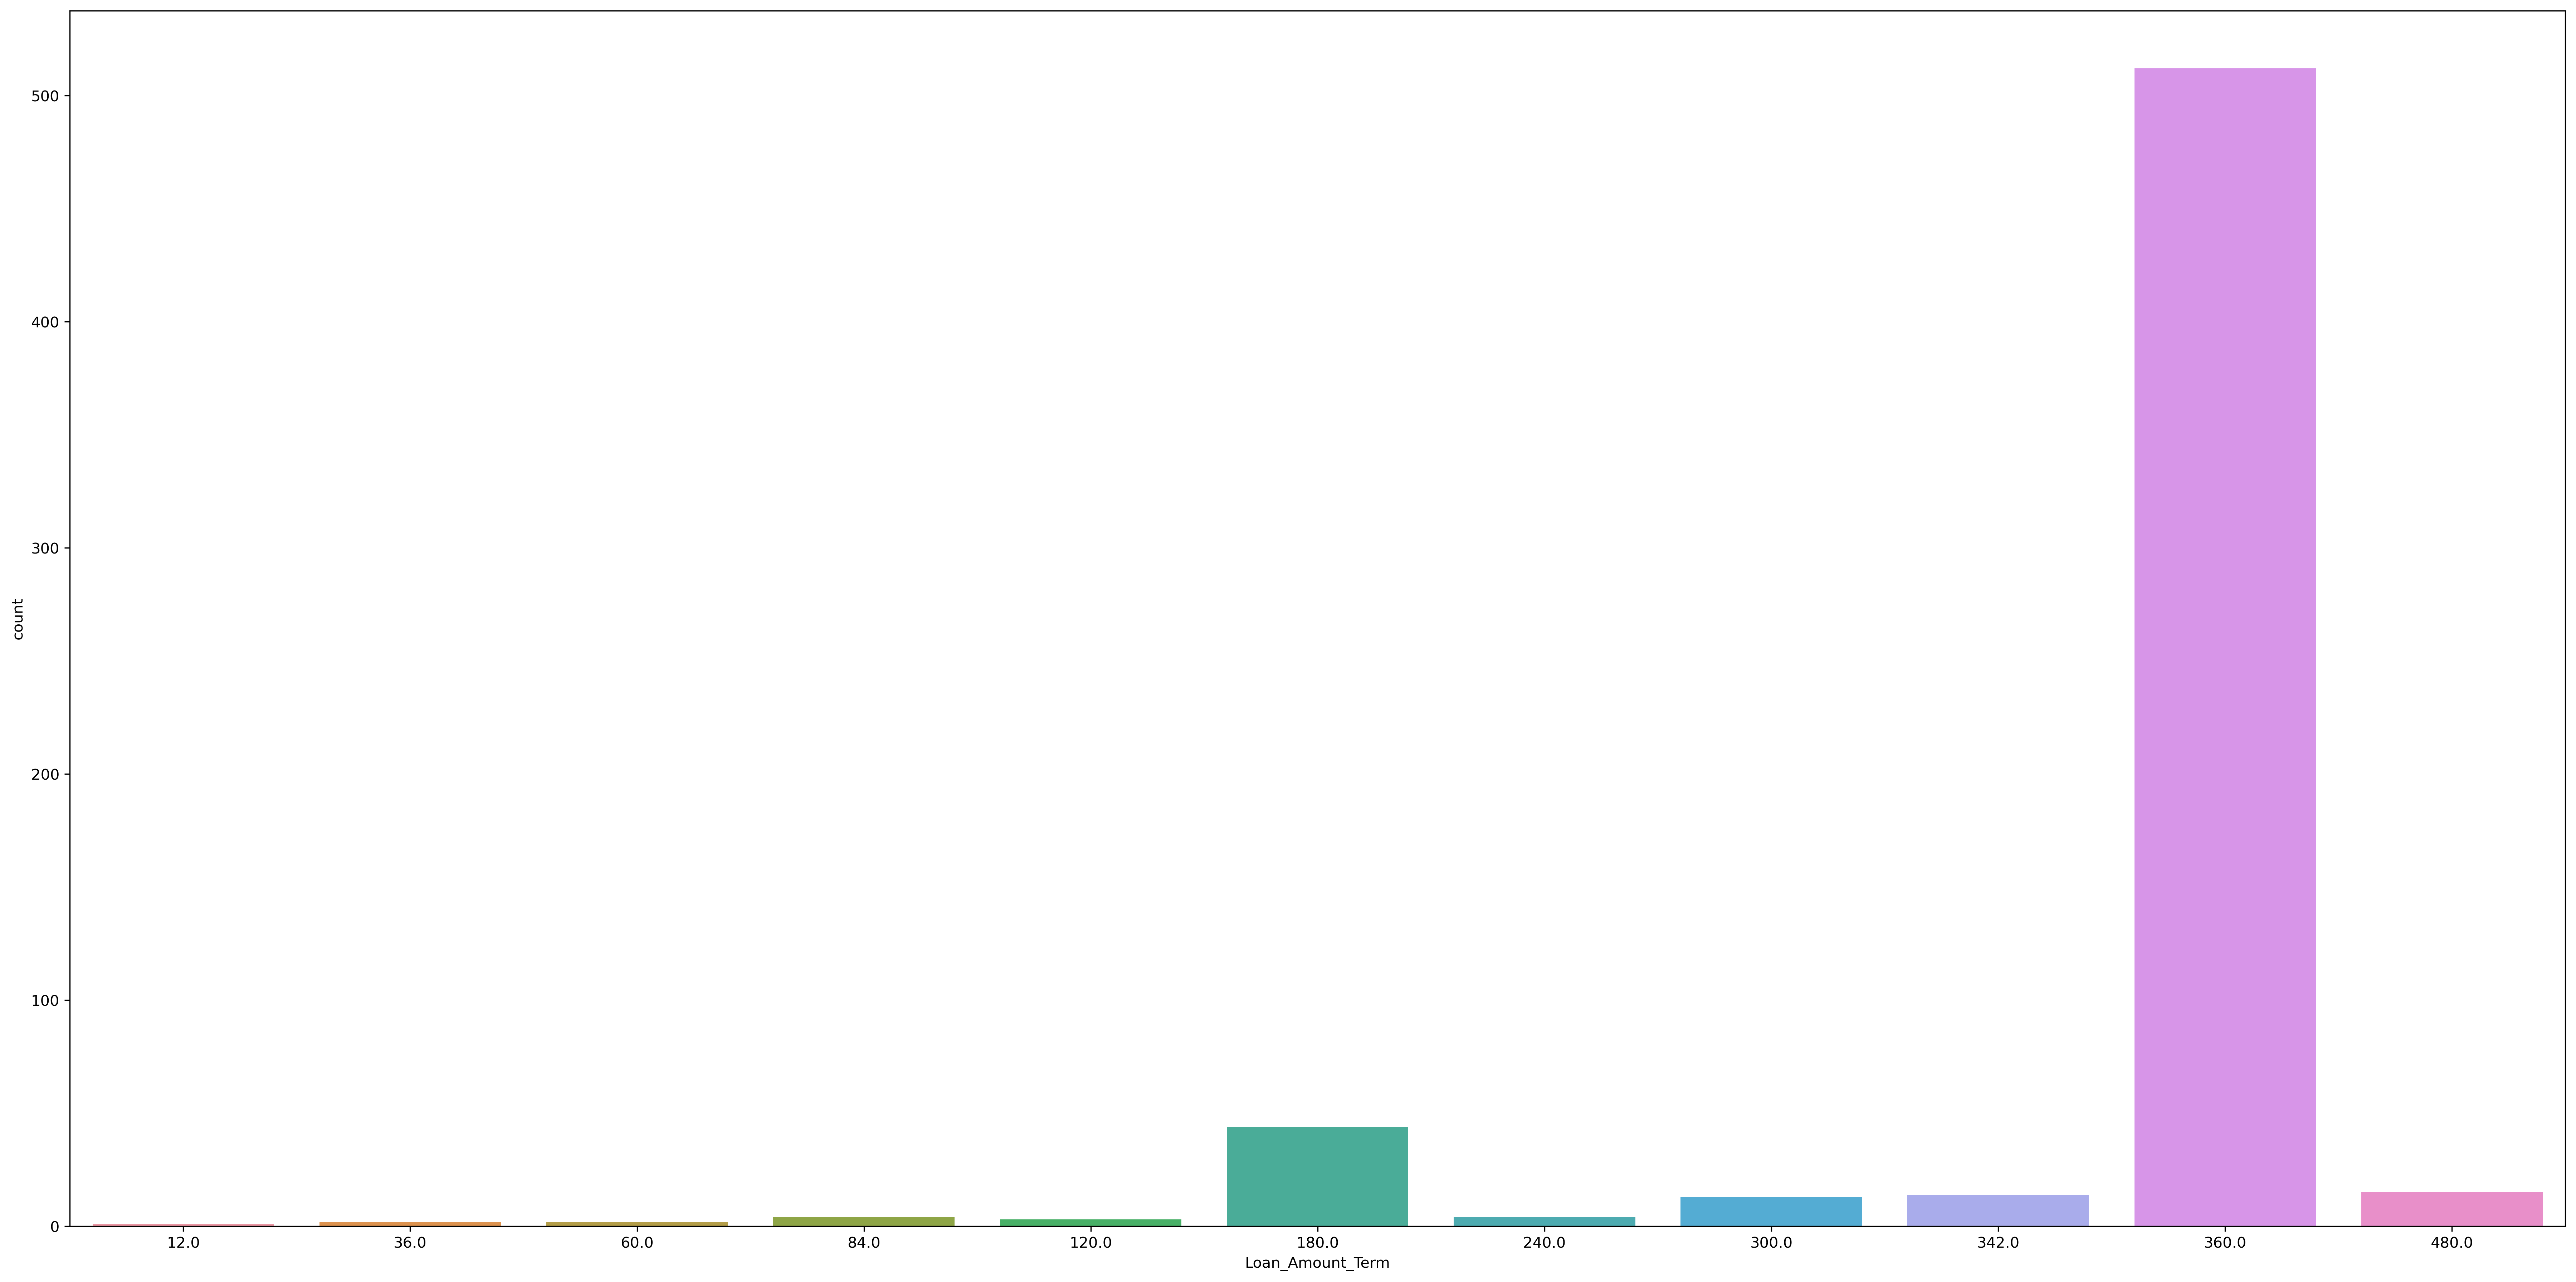

In [46]:
plt.figure(figsize=(30,15),dpi=300)
sns.countplot(data.Loan_Amount_Term);

I can see that the category "12.0" is with lowest count and highest count is in the category "360.0" and outliers can also be seen in boxplot and also I can say that distribution is not normal.

#### Credit_History:

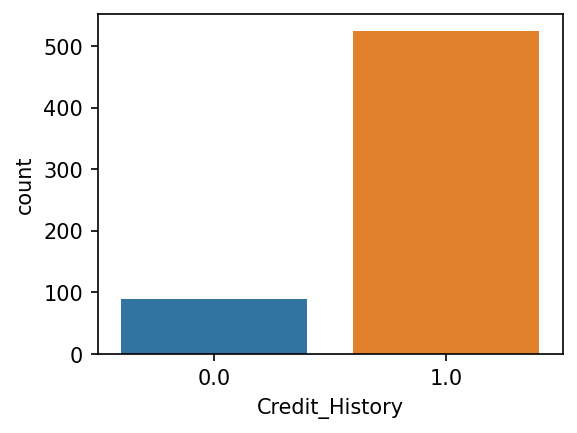

In [48]:
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(data.Credit_History);

I can see that the "Credit_History" is highest in category "1.0" .

#### Property_Area:

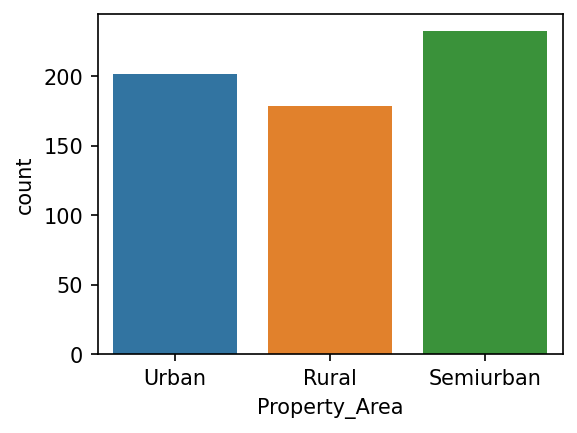

In [49]:
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(data.Property_Area);

I can see that the Count is more in the Category "Semiurban" and least in the category "Rural".

### Bivariate Analysis:

As our prediction is "Loan_status", now we will analyse all the columns based on it :

In [50]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### i.   Relationship between "Loan_Status" and "Gender" :

<AxesSubplot:xlabel='Loan_Status', ylabel='Gender'>

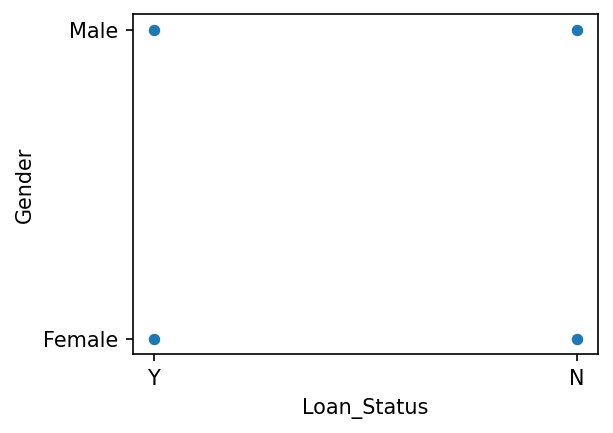

In [54]:
plot = plt.figure(figsize = (4,3),dpi=150)
sns.scatterplot(x = 'Loan_Status', y ='Gender', data = data )

I can see that there is no effective plots between the columns and with no distribution pattern and density.

### ii. Relationship between "Loan_status" and "Married":

<AxesSubplot:xlabel='Loan_Status', ylabel='Married'>

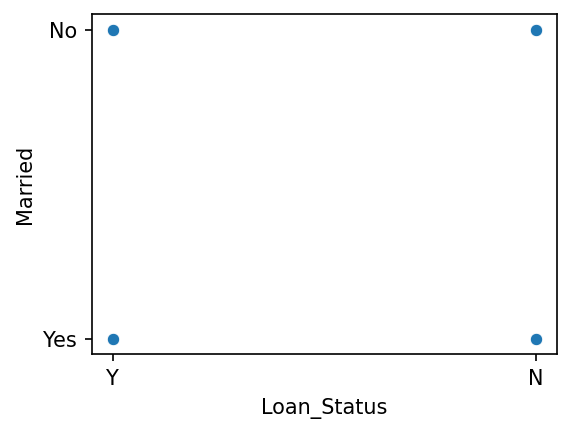

In [55]:
plot = plt.figure(figsize = (4,3),dpi=150)
sns.scatterplot(x = 'Loan_Status', y = 'Married', data = data )

I can see that there is no effective plots between the columns and with no distributio pattern and density.

### ii. Relationship between "Loan_status" and "Dependents":

<AxesSubplot:xlabel='Loan_Status', ylabel='Dependents'>

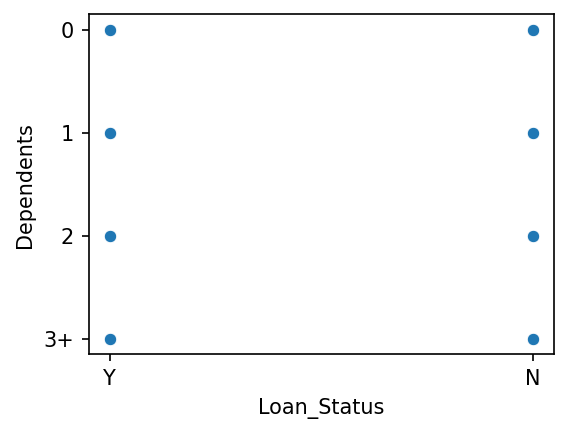

In [56]:
plot = plt.figure(figsize = (4,3),dpi=150)
sns.scatterplot(x = 'Loan_Status', y = 'Dependents', data = data )

I can see that as the "Dependents" are increasing the categories Y and N are with no effective distribution pattern.

### iii. Relationship between  "Loan_status"  and  "Education" :

<AxesSubplot:xlabel='Loan_Status', ylabel='Education'>

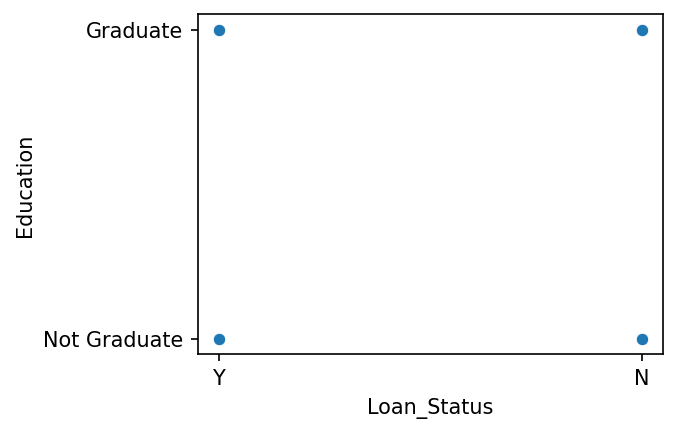

In [57]:
plot = plt.figure(figsize = (4,3),dpi=150)
sns.scatterplot(x = 'Loan_Status', y = 'Education', data =data )

I can see that there is no effective plots between the columns and with no distributio pattern and density.

### iv. Relationship between "Loan_status" and "Self_Employed":

<AxesSubplot:xlabel='Loan_Status', ylabel='Self_Employed'>

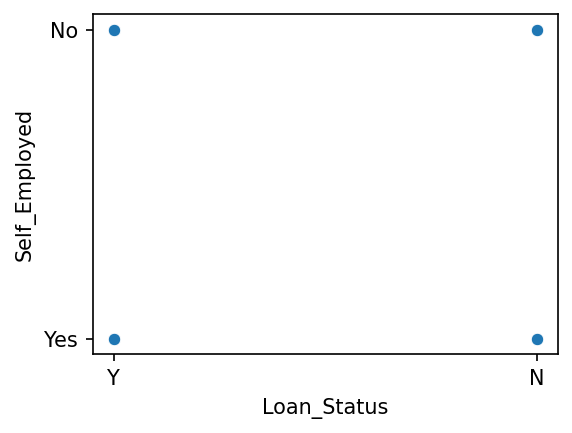

In [59]:
plot = plt.figure(figsize = (4,3),dpi=150)
sns.scatterplot(x = 'Loan_Status', y = 'Self_Employed', data =data )

I can see that there is no effective plots between the columns and with no distributio pattern and density.

### v. Relationship between "Loan_status" and "ApplicantIncome" :

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

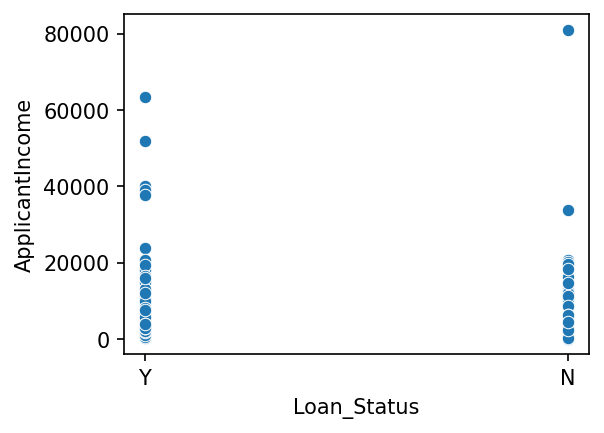

In [61]:
plot = plt.figure(figsize = (4,3), dpi=150)
sns.scatterplot(x = 'Loan_Status', y = 'ApplicantIncome', data =data )

I can see that the highest value of "ApplicantIncome" i.e around 80000, there is no density in the category "Y" as well as in category "N". In both of them the density is more in lower side of the "ApplicantIncome".

### vi. Relationship between "Loan_status" and "CoapplicantIncome":

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

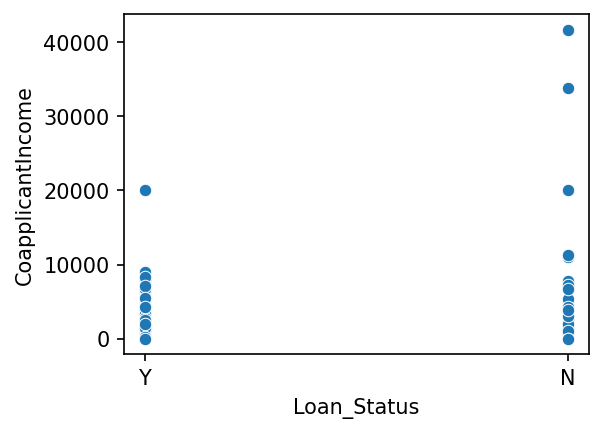

In [63]:
plot = plt.figure(figsize = (4,3),dpi=150)
sns.scatterplot(x = 'Loan_Status', y = 'CoapplicantIncome', data =data )

I can see that the highest value of "CoapplicantIncome" i.e around 40000, there is no density in the category "Y" as well as in category "N". In both of them the density is more in lower side of the "CoapplicantIncome".

### vii. Relationship between "Loan_status" and "LoanAmount" : 

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

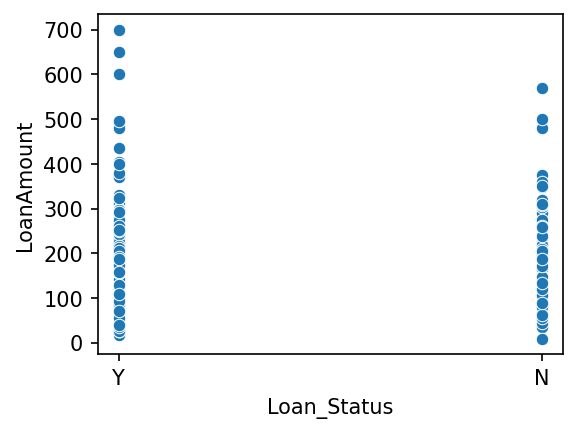

In [64]:
plot = plt.figure(figsize = (4,3),dpi=150)
sns.scatterplot(x = 'Loan_Status', y = 'LoanAmount', data =data )

I can see that as the "LoanAmount" increases the density distribution decreased and is more in both of the categories of the column "Loan_Status" in the lower side of the "LoanAmount".

### viii. Relationship between "Loan_status" and "Loan_Amount_Term" :

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

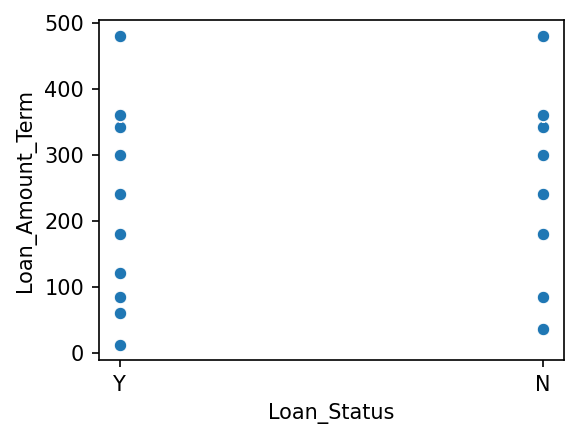

In [65]:
plot = plt.figure(figsize = (4,3),dpi=150)
sns.scatterplot(x = 'Loan_Status', y = 'Loan_Amount_Term', data =data)

I can see that as the "Loan_Amount_Term" increases we can see that there is uneven distribution of the "Loan_Status" (Y and N).

### ix. Relationship between "Loan_status" and "Credit_History" :

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

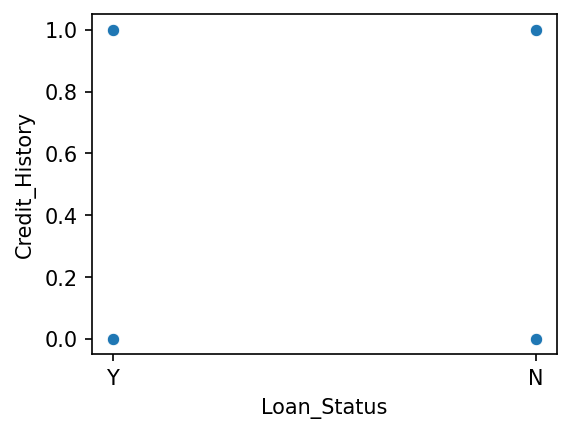

In [66]:
plot = plt.figure(figsize = (4,3),dpi=150)
sns.scatterplot(x = 'Loan_Status', y = 'Credit_History', data =data )

I can see that in the column "Credit_History" there is Loan_Status(Y) for Credit_History (0.0) and also there is Loan_Status(N) for Credit_History(0.0) and is same for highest Credit_History(1.0)

### x. Relationship between "Loan_status" and "Property_Area" :

<AxesSubplot:xlabel='Loan_Status', ylabel='Property_Area'>

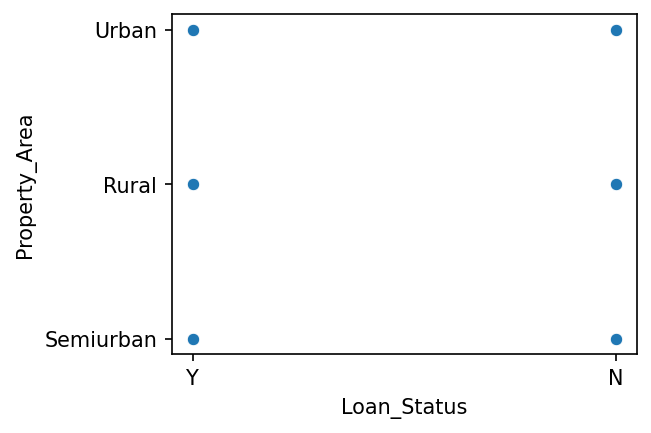

In [67]:
plot = plt.figure(figsize = (4,3),dpi=150)
sns.scatterplot(x = 'Loan_Status', y = 'Property_Area', data =data)

I can see that as the column "Property_Area" is with different categories and few of them in each of the categories are with Loan_Status(Y) and the few with Loan_Status(N)

### Multivariate Analysis:

#### Finding the correlation between the variables:

In [68]:
corr_data = data.corr()

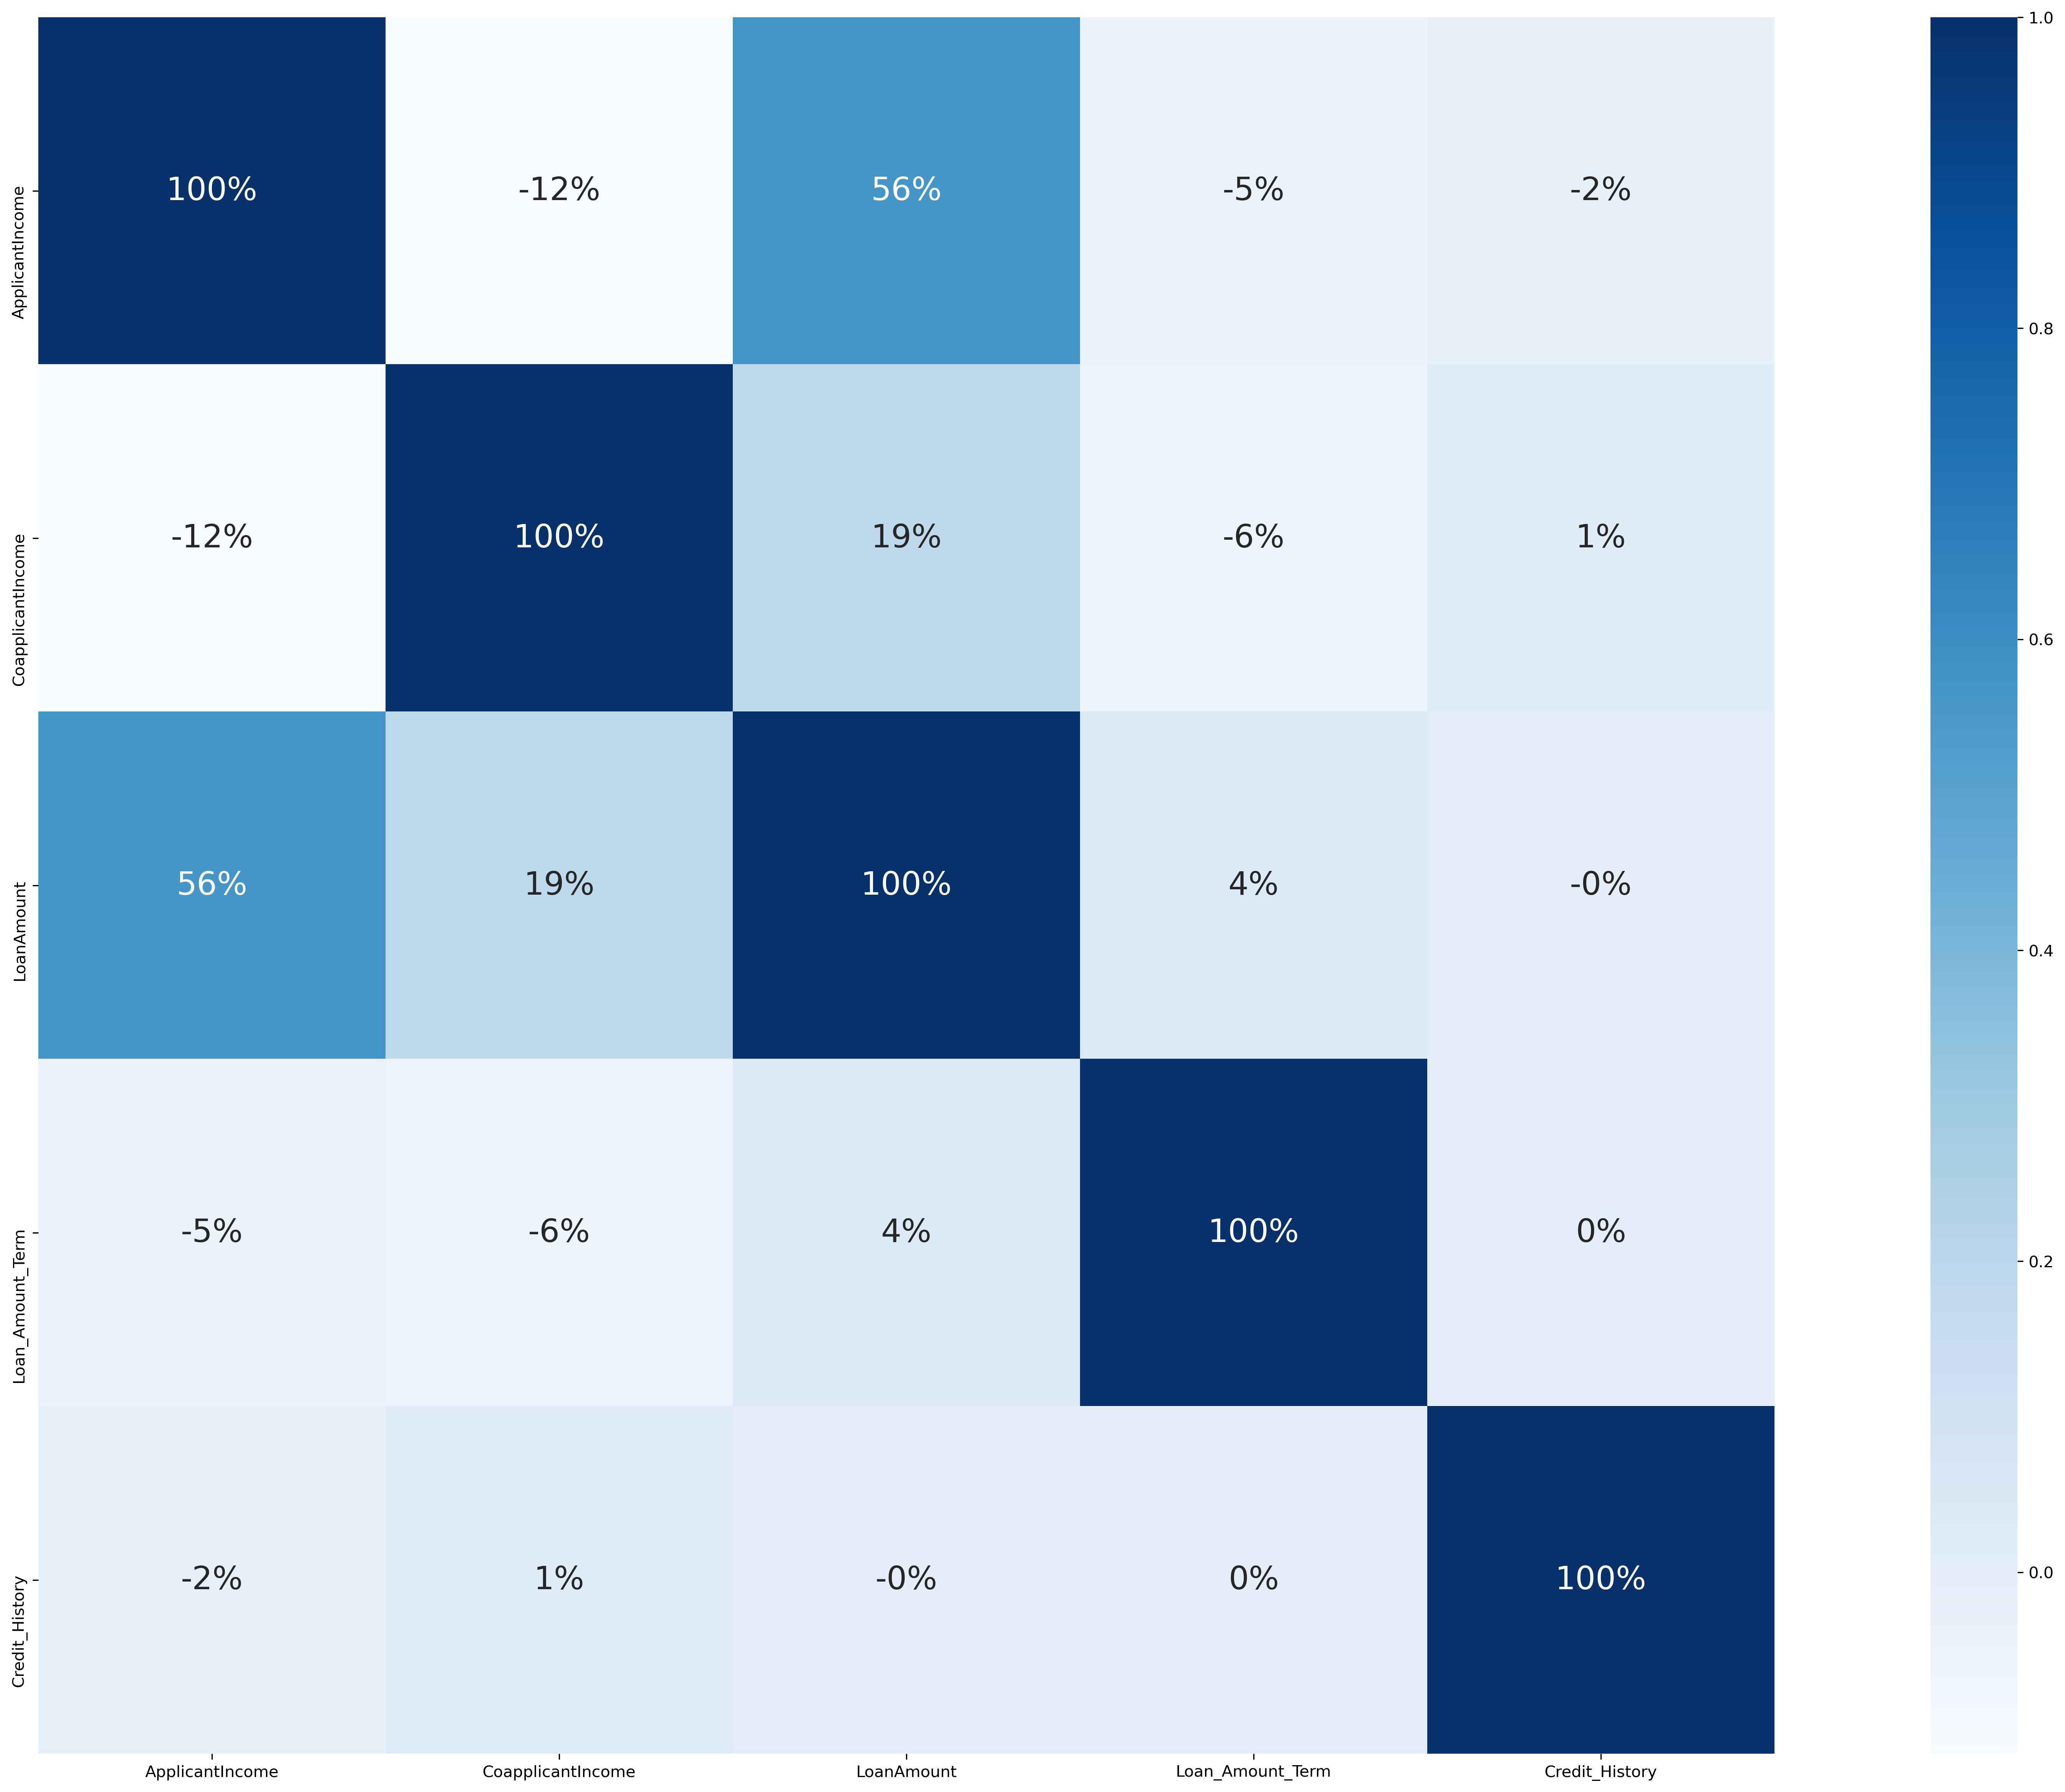

In [70]:
plt.figure(figsize =(35,20),dpi=300)
sns.heatmap(corr_data,annot = True,fmt = ".0%",cbar = True,square = True,annot_kws = {'size': 20}, cmap = 'Blues')
plt.show()

Documentation:
    
I can see that all the variables with low correlation with eachother and the columns "Loanamount" and the "Applicantincome" are with correlation of 56%.

#### Checking the data description through statistical analysis of the data :

In [71]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.000000,0.855049
std,6109.041673,2926.248369,84.180967,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


I can see that the columns are with equal count to the number of rows present.

### Transforming the data :

#### Transforming the non-numerical columns into numerical:

In [73]:
from sklearn.preprocessing import LabelEncoder

Inspite of mentioning each and every which has strings we user "forloop" here as the data seems to be big.

In [74]:
for column in data.columns:
    if data[column].dtype == np.number:
        continue
    data[column] = LabelEncoder().fit_transform(data[column])
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,306,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,139,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,90,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,381,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,275,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,431,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,422,0.0,187.0,360.0,1.0,2,1


I can see that the "non-numerical" data is transformed into the numerical data.

### Checking the Outliers:

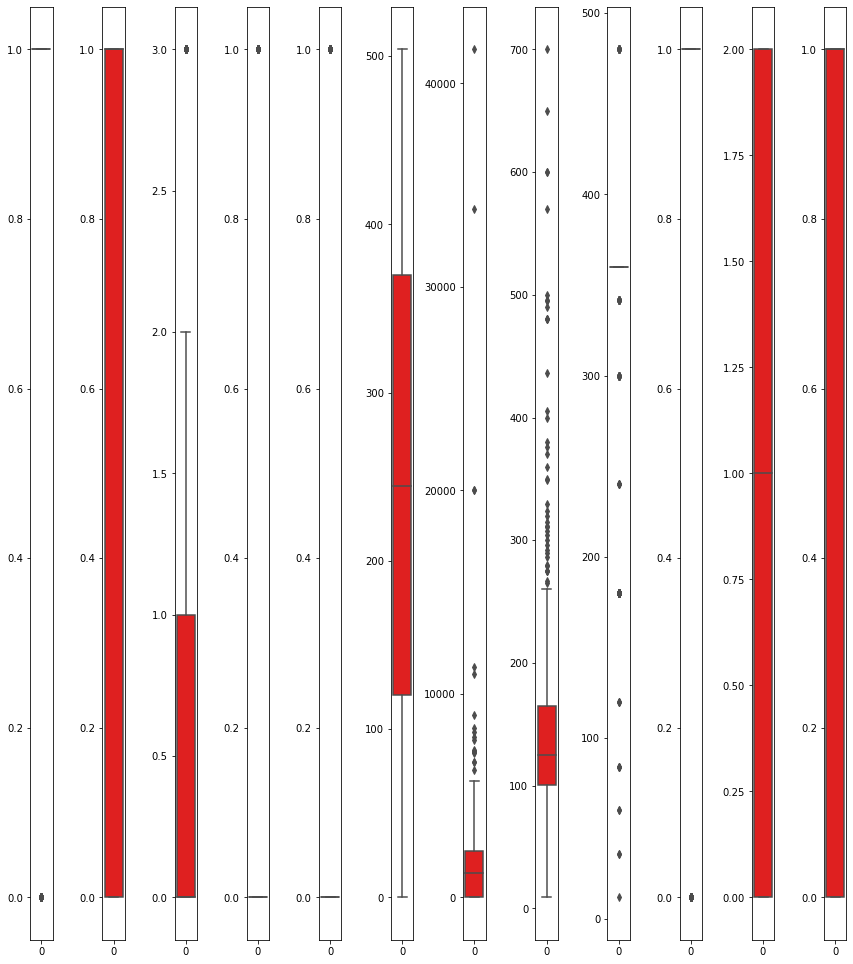

In [76]:
col_list = data.columns.values
ncol = 32
nrows = 12
plt.figure(figsize = (ncol,5*ncol))
for i in range (0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = data[col_list[i]],color = 'red', orient = 'v')
    plt.tight_layout()

Documentation:

I can see that few of the columns are with the outliers and also we have to remove the outliers and nextly I have to reduce the outliers to get a good accuracy with our model building.

#### Removing the Outliers using - Z - Score method:

In [78]:
from scipy.stats import zscore
z = np.abs(zscore(data))
z.shape

(614, 12)

In [79]:
threshold = 3
print(np.where(z>3))

(array([  9,  14,  68,  94, 130, 133, 155, 171, 177, 177, 242, 262, 278,
       308, 313, 333, 369, 402, 417, 432, 487, 495, 497, 506, 523, 525,
       546, 561, 575, 581, 585, 600, 604], dtype=int64), array([6, 8, 8, 8, 7, 8, 7, 7, 6, 7, 8, 8, 7, 7, 8, 7, 7, 6, 6, 7, 7, 8,
       8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7], dtype=int64))


In [80]:
len(np.where(z>3))

2

In [81]:
len(np.where(z>3)[0])

33

In [83]:
data_new = data[(z<3).all(axis = 1)]
print(data.shape)
print(data_new.shape)

(614, 12)
(582, 12)


I can see that the rows are reduced from the original data.

#### Loss percentage calculation:

In [84]:
loss_percent = (614-582)/614*100
print(loss_percent)

5.211726384364821


I can see that the data percent lost is 5.2%

#### Skewness:

In [85]:
data_new.skew()

Gender              -1.636555
Married             -0.636160
Dependents           1.044261
Education            1.319920
Self_Employed        2.244210
ApplicantIncome      0.044622
CoapplicantIncome    1.348959
LoanAmount           1.243160
Loan_Amount_Term    -2.090517
Credit_History      -1.971149
Property_Area       -0.048661
Loan_Status         -0.818715
dtype: float64

In [86]:
features = ["Gender","Dependents","Education","Self_Employed","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]
features

['Gender',
 'Dependents',
 'Education',
 'Self_Employed',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [87]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [89]:
data_new[features] = scaler.fit_transform(data_new[features].values)
data_new[features]

,Gender,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.474619,-0.814463,-0.538949,-0.381666,-1.115765,-0.151331,0.141656,0.419235
1,0.474619,0.888792,-0.538949,-0.381666,0.751320,0.000782,0.141656,0.419235
2,0.474619,-0.814463,-0.538949,2.620089,-1.115765,-1.432692,0.141656,0.419235
3,0.474619,-0.814463,1.855464,-0.381666,0.900672,-0.151331,0.141656,0.419235
4,0.474619,-0.814463,-0.538949,-0.381666,-1.115765,0.234147,0.141656,0.419235
...,...,...,...,...,...,...,...,...
609,-2.106953,-0.814463,-0.538949,-0.381666,-1.115765,-1.287906,0.141656,0.419235
610,0.474619,1.530271,-0.538949,-0.381666,-1.115765,-2.345595,-2.568844,0.419235
611,0.474619,0.888792,-0.538949,-0.381666,0.186479,1.791679,0.141656,0.419235
612,0.474619,1.336594,-0.538949,-0.381666,-1.115765,0.953750,0.141656,0.419235


In [90]:
data_new.skew()

Gender              -1.636555
Married             -0.636160
Dependents           0.467609
Education            1.319920
Self_Employed        2.244210
ApplicantIncome      0.044622
CoapplicantIncome   -0.181155
LoanAmount           0.046979
Loan_Amount_Term     0.727593
Credit_History      -1.971149
Property_Area       -0.048661
Loan_Status         -0.818715
dtype: float64

I can see that skewness of few of the columns are reduced to certain extent.

### Data preprocessing:

#### Seaparating the independent and target variables:

In [91]:
data_new.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [92]:
X = data_new.drop("Loan_Status", axis=1)
y = data_new["Loan_Status"]

In [93]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.474619,0,-0.814463,-0.538949,-0.381666,376,-1.115765,-0.151331,0.141656,0.419235,2
1,0.474619,1,0.888792,-0.538949,-0.381666,306,0.751320,0.000782,0.141656,0.419235,0
2,0.474619,1,-0.814463,-0.538949,2.620089,139,-1.115765,-1.432692,0.141656,0.419235,2
3,0.474619,1,-0.814463,1.855464,-0.381666,90,0.900672,-0.151331,0.141656,0.419235,2
4,0.474619,0,-0.814463,-0.538949,-0.381666,381,-1.115765,0.234147,0.141656,0.419235,2


In [94]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

#### Scaling the data using Standard Scaler:

In [95]:
from sklearn.preprocessing import  StandardScaler

In [97]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)
X_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.474619,-1.366380,-0.814463,-0.538949,-0.381666,0.950626,-1.115765,-0.151331,0.141656,0.419235,1.233857
1,0.474619,0.731861,0.888792,-0.538949,-0.381666,0.451116,0.751320,0.000782,0.141656,0.419235,-1.303615
2,0.474619,0.731861,-0.814463,-0.538949,2.620089,-0.740572,-1.115765,-1.432692,0.141656,0.419235,1.233857
3,0.474619,0.731861,-0.814463,1.855464,-0.381666,-1.090229,0.900672,-0.151331,0.141656,0.419235,1.233857
4,0.474619,-1.366380,-0.814463,-0.538949,-0.381666,0.986305,-1.115765,0.234147,0.141656,0.419235,1.233857
...,...,...,...,...,...,...,...,...,...,...,...
577,-2.106953,-1.366380,-0.814463,-0.538949,-0.381666,-0.840474,-1.115765,-1.287906,0.141656,0.419235,-1.303615
578,0.474619,0.731861,1.530271,-0.538949,-0.381666,0.229905,-1.115765,-2.345595,-2.568844,0.419235,-1.303615
579,0.474619,0.731861,0.888792,-0.538949,-0.381666,1.343098,0.186479,1.791679,0.141656,0.419235,1.233857
580,0.474619,0.731861,1.336594,-0.538949,-0.381666,1.278875,-1.115765,0.953750,0.141656,0.419235,1.233857


#### Checking the multicollinearity through VIF :

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif

,features,vif_Factor
0,Gender,1.219890
1,Married,1.432560
2,Dependents,1.191969
3,Education,1.071243
4,Self_Employed,1.046380
5,ApplicantIncome,1.929314
6,CoapplicantIncome,1.621456
7,LoanAmount,1.652245
8,Loan_Amount_Term,1.046520
9,Credit_History,1.011408


I can see that VIF values are with less values and are not that affective.

In [101]:
X= X_scaled

#### Train_test_split:

In [112]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 56156156)

### Training the model:

In [113]:
models = {"LogisticRegression" : LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Decision Tree"      : DecisionTreeClassifier(),
          "Random Forest"      : RandomForestClassifier(),
          "Gradient Boosting"  : GradientBoostingClassifier()}

for name, model in models.items():
    model.fit(X_train,y_train)
    print(name + " is trained now.")

LogisticRegression is trained now.
K-Nearest Neighbors is trained now.
Decision Tree is trained now.
Random Forest is trained now.
Gradient Boosting is trained now.


### Testing the model:

In [111]:
for name, model in models.items():
    print(name + ": {:,.2f}%".format(model.score(X_test,y_test)*100))

LogisticRegression: 80.29%
K-Nearest Neighbors: 79.71%
Decision Tree: 75.43%
Random Forest: 81.14%
Gradient Boosting: 80.57%


I can see that I have trained our models now and our model is ready for testing.

### Hyper parameter tuning:

#### GridSearch CV:

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
parameters ={'n_estimators':[100,150,200,250],
        'criterion':['gini','entropy'],
        'max_depth':[13,15,16,17],
        'min_samples_split':[2,3,4,5,6],
        'bootstrap':[True,False],
        'n_jobs':[-1,-2,-3]}

### Random Forest Classifier:

In [116]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [117]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [13, 15, 16, 17],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 150, 200, 250],
                         'n_jobs': [-1, -2, -3]})

In [118]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_split': 6,
 'n_estimators': 150,
 'n_jobs': -3}

I can see that these are the best parameters we got.

#### Fitting best parameters to the model:

In [121]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [122]:
RandomForest_model = RandomForestClassifier(bootstrap = False, criterion = 'gini', max_depth = 17, min_samples_split = 2,
                                n_estimators = 250, n_jobs = -3)
RandomForest_model.fit(X_train,y_train)
RandomForest_model_prediction  = RandomForest_model.predict(X_test)
RandomForest_score  = accuracy_score(y_test,RandomForest_model_prediction)
print('The Accuracy score for the Tuned Decision Trees Classifier is' , RandomForest_score)

The Accuracy score for the Tuned Decision Trees Classifier is 0.7606837606837606


### Classification Report :

In [123]:
print(classification_report(y_test,RandomForest_model_prediction))

              precision    recall  f1-score   support

           0       0.69      0.47      0.56        38
           1       0.78      0.90      0.84        79

    accuracy                           0.76       117
   macro avg       0.74      0.69      0.70       117
weighted avg       0.75      0.76      0.75       117



In [124]:
from sklearn.metrics import roc_auc_score

In [125]:
print(roc_auc_score(y_test, RandomForest_model_prediction))

0.6862091938707529


I can see that ROC - AUC Curve is with 68.62%

### ROC - AUC Curve:

In [126]:
from sklearn.metrics import roc_curve, auc

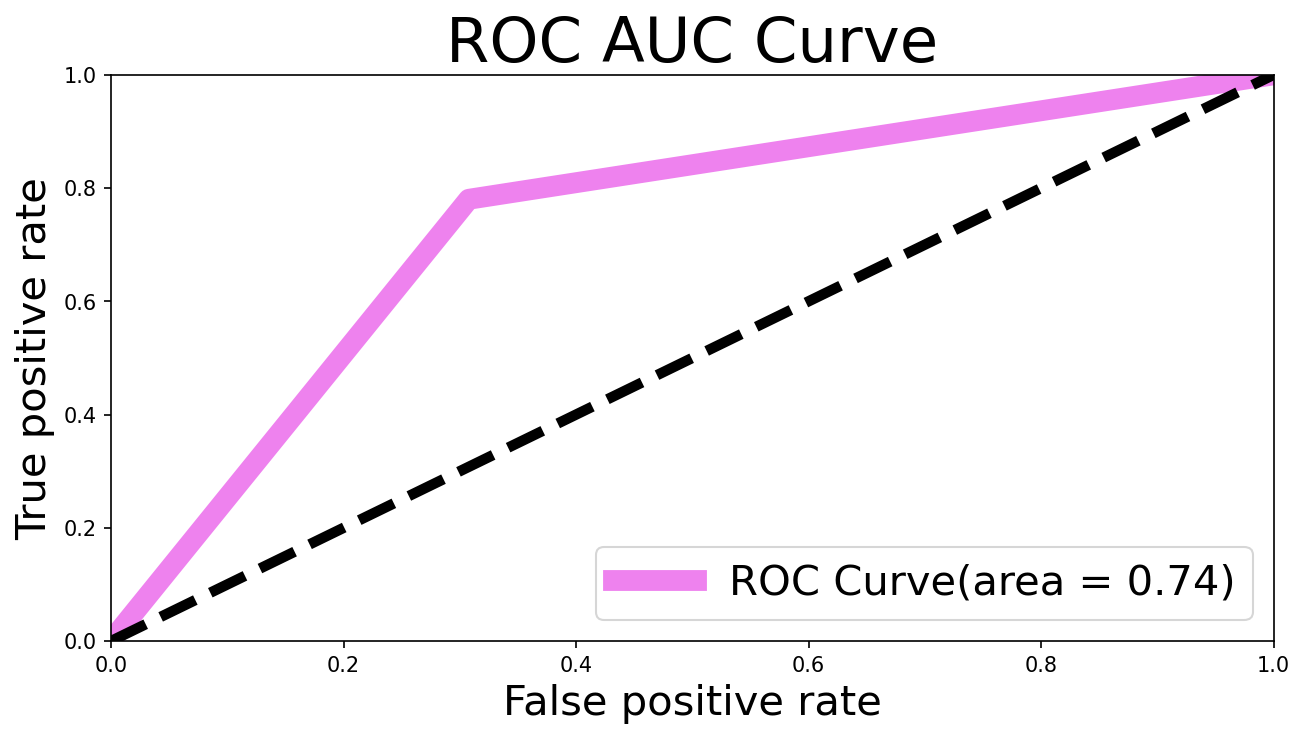

In [130]:
from sklearn.metrics import roc_curve, auc
fpr,tpr, thresholds  = roc_curve(RandomForest_model_prediction, y_test)
roc_auc = auc(fpr,tpr)

plt.figure(figsize = (10,5),dpi=150)
plt.plot(fpr, tpr, lw=10, color = 'violet',label = 'ROC Curve(area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],lw =5, color ='black', linestyle = '--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False positive rate', fontsize = 20)
plt.ylabel('True positive rate', fontsize  =20)
plt.title('ROC AUC Curve', fontsize = 30)
plt.legend(loc ='lower right', fontsize = 20)
plt.show()


I can see that ROC Curve is 74% which is a good accuracy.

## So the best model is :-
## RandomForestModel is with accuracy of 74%

#### Saving the model :

In [128]:
from sklearn.ensemble import  RandomForestClassifier 

In [129]:
import pickle
filename='loan.pkl'
pickle.dump(RandomForestClassifier,open(filename,'wb'))